In [1]:
import numpy as np
A = []
N = 1200
m = int(N/10)

In [8]:
"""
#polynomial with certain irreducible poly
#For simplicity p = 17 and the irred is fixed. 
from sympy import *
def polyn(n,y,q,h,p = 17,irred = None):
    a=[]
    quotient = int(n/q)
    rem = n%q
    a.append(rem)
    while(quotient != 0):
        a.append(quotient%q)
        quotient = int(quotient/q) 
    for i in range(17-len(a)):
        a.append(0)
    #Got list of coeff in a
    #Define f and then take f^h
    x = symbols('x')
    f = 0
    for i in range(len(a)):
        f+= a[i]*x**i
    f2 = f**h
    irred = x**6 + 3*x + 1
    f_mod_E = prem(f2, irred)
    return (f_mod_E.subs(x,y)%p)

def measurement_matrices(p,r,N):
    sys_of_mat = []
    if r>=p:
        print('r should be less than p')
        return None
    else:
        for h in range(N):            
            matrix = np.zeros((p*p, p**(r+1)),dtype='int')           
            for i in range(p**(r+1)):
                for j in range(p):
                    val = polyn(i,j,p,h)
                    row_num = val + j*p
                    matrix[row_num][i] = 1
            sys_of_mat.append(matrix)
        return sys_of_mat
"""

In [250]:
#Checking RIP for matrix measurements
def matrix_rip_check(N,r):
    u = np.random.rand(N,1)
    u = u/np.linalg.norm(u)
    low_matrix = u*u.T
    for i in range(1,r):
        v = np.random.rand(N,1)
        v = v/np.linalg.norm(v)
        low_matrix+= v*v.T
    low_matrix = low_matrix/np.linalg.norm(low_matrix)
    #The low rank matrix has been created with Frobenius norm 1
    trace = []
    #Now we will create a system of matrices for measurement
    #This can possibly be improved using apt scaling and lesser measurements
    for j in range(r*r):
        vec = np.zeros(N)
        for i in range(0,N,2*r):
            vec[(i+j)%N] = (-1)**(i/(2*r))
        mat = []
        for j in range(N):
            mat.append(vec)
            vec = np.delete(np.insert(vec,0,vec[len(vec)-1]), len(vec))
        mat = np.array(mat)/np.sqrt(r)
        #Add trace of mat*low_matrix
        trace.append(np.trace(mat*low_matrix))
    return np.linalg.norm(trace)
#Checking the norm for N = 1200 and r = 3
matrix_rip_check(1200,3)

0.9709107856954144

In [252]:
#N= 1500, r = 5
matrix_rip_check(1500,5)

0.963731622097365

In [218]:
#Find the behaviour of norm of the trace vector for different N with fixed r, and different r with fixed N
def asymp_mat_rip(N_def = 1000, r_def = 5):
    N_asym = []
    r_asym = []
    for N in range(1200,2000,100):
        N_asym.append(matrix_rip_check(N,r_def))
    for r in range(1,20):
        r_asym.append(matrix_rip_check(N_def, r))
    return N_asym, r_asym
N_asym, r_asym = asymp_mat_rip(N_def = 5000)

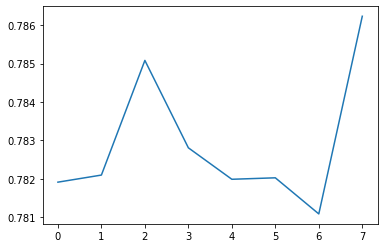

In [219]:
import matplotlib.pyplot as plt
plt.plot(N_asym)
plt.show()

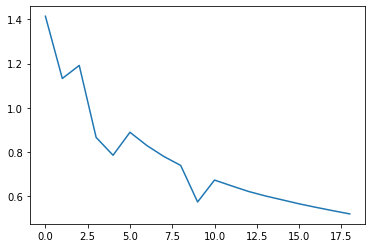

In [220]:
plt.plot(r_asym)
plt.show()

In [254]:
#For rank = int(N/400), the traces are calculated
def monte_carlo():
    asym = {}
    for N in range(500,5000,100):
        asym[N] = []
        for r in range(1, int(N/400)):
            asym[N].append(matrix_rip_check(N,r))
    return asym
asym = monte_carlo()

In [255]:
asym

{500: [],
 600: [],
 700: [],
 800: [1.0000000000000002],
 900: [1.0],
 1000: [1.0],
 1100: [1.0],
 1200: [1.0, 0.7999120412721235],
 1300: [0.9999999999999999, 0.7988962882444313],
 1400: [1.0000000000000002, 0.7994694951072001],
 1500: [1.0, 0.8025490460640176],
 1600: [0.9999999999999999, 0.8037866227627437, 0.9674832298666891],
 1700: [1.0000000000000002, 0.7990492920654857, 1.19778258737734],
 1800: [1.0000000000000002, 0.8003127192928351, 0.9697354021609281],
 1900: [1.0, 0.7961789956302223, 0.9671541457323268],
 2000: [0.9999999999999998,
  0.7980256496396354,
  1.1899963836117688,
  0.8605680539700452],
 2100: [0.9999999999999999,
  0.8013743033497802,
  0.9705629148608325,
  1.0551614937013956],
 2200: [0.9999999999999996,
  0.8026544576500849,
  0.9699661569568178,
  0.8621416951199048],
 2300: [0.9999999999999993,
  0.7949053892483937,
  1.1883986156845623,
  1.0564643783554641],
 2400: [1.0000000000000004,
  0.8008654843211755,
  0.9709420727154984,
  0.8617965230129675,
  

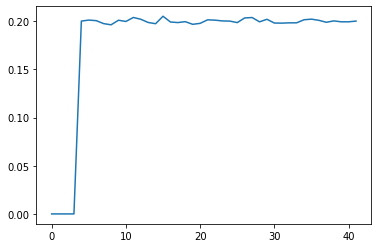

In [267]:
#We see the delta value by looking at the maximum and minimum of the traces we found
#in the previous step for each N and a range of r values
delta = []
for i in range(3,len(asym)):
    minimum = min(list(asym.values())[i])
    maximum = max(list(asym.values())[i])
    delta.append(max(1-minimum,maximum-1))
plt.plot(delta)
plt.show()

In [268]:
#Norm check for N = 10000, r = 25 (r = 10000/400)
matrix_rip_check(10000,25)

0.9473652273275481